In [4]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


data = pd.read_csv("df.csv")
data.head()

,Company,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Sector
0,2Q3DU,1.19,0.20,2.21,0.0770,6.66,0.40,0.43,1.95,5.93,Industrials
1,46JNq,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,Communication Services
2,4ISOt,2.93,0.04,1.43,0.3055,6.55,0.72,0.06,7.78,18.38,Communication Services
3,5AWwu,1.03,0.25,3.55,0.0708,146.43,1.80,0.88,6.17,5.15,Consumer Defensive
4,5hbZR,1.20,0.47,0.00,0.1677,30.92,0.93,0.00,0.00,17.06,Consumer Cyclical


In [5]:
data.shape

(100, 11)

In [6]:
data.info

<bound method DataFrame.info of    Company    CR    DA     FL     OPM      RT   TAT     DE      Y     PT  \
0    2Q3DU  1.19  0.20   2.21  0.0770    6.66  0.40   0.43   1.95   5.93   
1    46JNq  0.29  0.64  10.14  0.2037   20.04  0.36   6.52   7.26  43.48   
2    4ISOt  2.93  0.04   1.43  0.3055    6.55  0.72   0.06   7.78  18.38   
3    5AWwu  1.03  0.25   3.55  0.0708  146.43  1.80   0.88   6.17   5.15   
4    5hbZR  1.20  0.47   0.00  0.1677   30.92  0.93   0.00   0.00  17.06   
..     ...   ...   ...    ...     ...     ...   ...    ...    ...    ...   
95   yhCH3  1.50  0.37   2.33  0.2557    4.92  0.41   0.85   5.18   6.83   
96   YqdX2  0.70  0.27   2.57  0.2363   16.11  0.64   0.69   7.40   2.70   
97   yUjyz  1.49  0.12   2.36  0.2576    8.64  0.51   0.28   5.99   7.59   
98   YX515  2.30  0.64  25.03  0.3758    7.48  0.31  16.08  41.57  10.54   
99   zCRGR  1.40  0.21   2.35  0.2391    7.08  0.45   0.50   3.35   5.53   

                    Sector  
0              Industrials

In [7]:
data.describe()

,CR,DA,FL,OPM,RT,TAT,DE,Y,PT
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,1.584900,0.306900,4.339400,0.203194,20.291200,0.736200,1.630100,11.896500,9.04180
std,0.986402,0.166786,5.303547,0.151455,57.688951,0.521228,2.852374,18.017399,11.82557
min,0.290000,0.000000,0.000000,-0.097000,0.000000,0.140000,0.000000,0.000000,0.00000
25%,1.047500,0.190000,1.902500,0.086600,5.725000,0.400000,0.407500,2.980000,4.16000
50%,1.270000,0.295000,2.940000,0.191800,8.380000,0.540000,0.710000,6.080000,5.95500
75%,1.735000,0.412500,4.482500,0.267975,14.442500,0.897500,1.550000,13.890000,8.85500
max,5.890000,0.710000,32.520000,0.752200,553.470000,3.240000,16.080000,109.240000,74.34000


In [8]:
data = data.drop(columns=["Company","Sector"])

In [9]:
data = data.reindex(columns=['Y', 'CR', 'DA', 'FL', 'OPM', 'RT', 'TAT', 'DE', 'PT'])

In [10]:
data.head()

,Y,CR,DA,FL,OPM,RT,TAT,DE,PT
0,1.95,1.19,0.20,2.21,0.0770,6.66,0.40,0.43,5.93
1,7.26,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,43.48
2,7.78,2.93,0.04,1.43,0.3055,6.55,0.72,0.06,18.38
3,6.17,1.03,0.25,3.55,0.0708,146.43,1.80,0.88,5.15
4,0.00,1.20,0.47,0.00,0.1677,30.92,0.93,0.00,17.06


In [11]:
data.corr()

,Y,CR,DA,FL,OPM,RT,TAT,DE,PT
Y,1.000000,-0.018690,0.164599,0.759323,0.051308,-0.046290,0.301222,0.724604,-0.001363
CR,-0.018690,1.000000,-0.225917,-0.179232,0.284529,-0.151203,-0.123665,-0.141136,-0.040483
DA,0.164599,-0.225917,1.000000,0.340320,0.015032,0.206620,-0.083691,0.464786,-0.120993
FL,0.759323,-0.179232,0.340320,1.000000,-0.112430,-0.076335,0.156169,0.968612,0.032588
OPM,0.051308,0.284529,0.015032,-0.112430,1.000000,0.051672,-0.298701,-0.050014,0.021409
RT,-0.046290,-0.151203,0.206620,-0.076335,0.051672,1.000000,0.206580,-0.065267,0.097708
TAT,0.301222,-0.123665,-0.083691,0.156169,-0.298701,0.206580,1.000000,0.094869,0.017872
DE,0.724604,-0.141136,0.464786,0.968612,-0.050014,-0.065267,0.094869,1.000000,-0.025348
PT,-0.001363,-0.040483,-0.120993,0.032588,0.021409,0.097708,0.017872,-0.025348,1.000000


Ukazatel, který má největší vliv na indikátor Y akcie: FL

In [12]:
data.corr().sort_values("Y", ascending=False)

,Y,CR,DA,FL,OPM,RT,TAT,DE,PT
Y,1.000000,-0.018690,0.164599,0.759323,0.051308,-0.046290,0.301222,0.724604,-0.001363
FL,0.759323,-0.179232,0.340320,1.000000,-0.112430,-0.076335,0.156169,0.968612,0.032588
DE,0.724604,-0.141136,0.464786,0.968612,-0.050014,-0.065267,0.094869,1.000000,-0.025348
TAT,0.301222,-0.123665,-0.083691,0.156169,-0.298701,0.206580,1.000000,0.094869,0.017872
DA,0.164599,-0.225917,1.000000,0.340320,0.015032,0.206620,-0.083691,0.464786,-0.120993
OPM,0.051308,0.284529,0.015032,-0.112430,1.000000,0.051672,-0.298701,-0.050014,0.021409
PT,-0.001363,-0.040483,-0.120993,0.032588,0.021409,0.097708,0.017872,-0.025348,1.000000
CR,-0.018690,1.000000,-0.225917,-0.179232,0.284529,-0.151203,-0.123665,-0.141136,-0.040483
RT,-0.046290,-0.151203,0.206620,-0.076335,0.051672,1.000000,0.206580,-0.065267,0.097708


<AxesSubplot: xlabel='FL', ylabel='Y'>

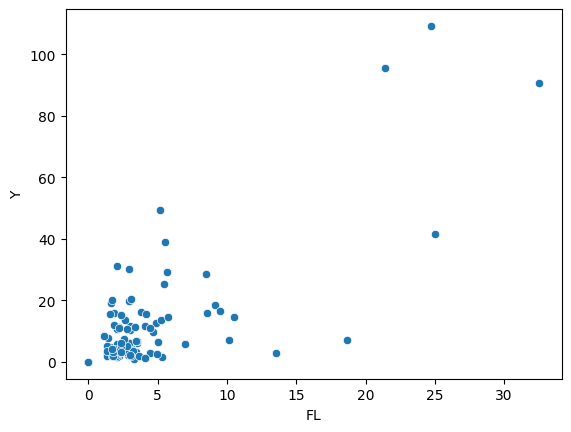

In [11]:
sns.scatterplot(data=data, x="FL", y="Y")

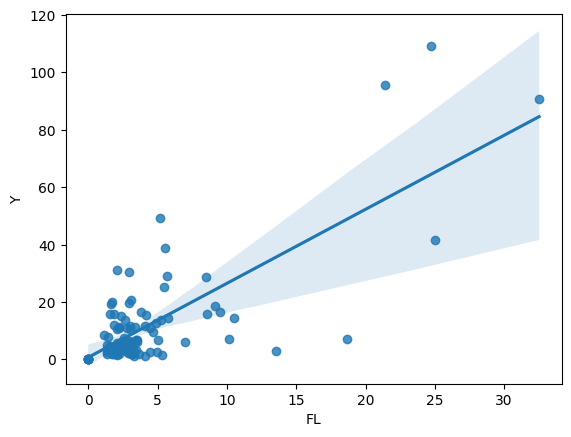

In [15]:
g = sns.regplot(data, x="FL", y="Y")

In [ ]:
sns.histplot(data=data, x="Y")

In [13]:
from statsmodels.stats.outliers_influence import OLSInfluence

formula = "Y ~ CR + DA + FL + OPM + RT + TAT + DE + PT"
mod = smf.ols(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     22.52
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           1.45e-18
Time:                        21:33:56   Log-Likelihood:                -375.94
No. Observations:                 100   AIC:                             769.9
Df Residuals:                      91   BIC:                             793.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.0176      5.347     -2.061      0.042     -21.638      -0.397
CR             1.5014      1.240      1.211      0.229      -0.961       3.964
DA            -5.2206      9.370     -0.557      0.579     -23.834      13.392
FL             3.0104      1.060      2.840      0.006       0.905       5.116
OPM           23.4665      8.076      2.906      0.005       7.425      39.508
RT            -0.0063      0.021     -0.300      0.765      -0.048       0.035
TAT            8.4254      2.351      3.584      0.001       3.756      13.095
DE            -0.7283      2.066     -0.352      0.725      -4.833       3.376
PT            -0.0644      0.096     -0.669      0.505      -0.256       0.127
==============================================================================
Omnibus:                       29.136   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.551
Skew:                           0.881   Prob(JB):                     8.88e-23
Kurtosis:                       7.611   Cond. No.                         592.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
#vynechám statisticky nevýznamné ukazatele ~ P>|t| < 0,05
formula = "Y ~ FL + OPM + TAT"
mod = smf.ols(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     59.51
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           7.99e-22
Time:                        21:33:59   Log-Likelihood:                -377.99
No. Observations:                 100   AIC:                             764.0
Df Residuals:                      96   BIC:                             774.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.4188      2.865     -3.637      0.000     -16.106      -4.732
FL             2.5281      0.208     12.149      0.000       2.115       2.941
OPM           24.8478      7.542      3.295      0.001       9.878      39.818
TAT            8.5518      2.205      3.879      0.000       4.176      12.928
==============================================================================
Omnibus:                       26.748   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.291
Skew:                           0.876   Prob(JB):                     2.71e-17
Kurtosis:                       6.904   Cond. No.                         50.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
data["Y_prediction"] = res.predict(data)
data.head()

,Y,CR,DA,FL,OPM,RT,TAT,DE,PT,Y_prediction
0,1.95,1.19,0.20,2.21,0.0770,6.66,0.40,0.43,5.93,0.502359
1,7.26,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,43.48,23.356512
2,7.78,2.93,0.04,1.43,0.3055,6.55,0.72,0.06,18.38,6.944718
3,6.17,1.03,0.25,3.55,0.0708,146.43,1.80,0.88,5.15,15.708512
4,0.00,1.20,0.47,0.00,0.1677,30.92,0.93,0.00,17.06,1.701358


In [16]:
data["Y_diff"]=data["Y"] - data["Y_prediction"]
data.head()

,Y,CR,DA,FL,OPM,RT,TAT,DE,PT,Y_prediction,Y_diff
0,1.95,1.19,0.20,2.21,0.0770,6.66,0.40,0.43,5.93,0.502359,1.447641
1,7.26,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,43.48,23.356512,-16.096512
2,7.78,2.93,0.04,1.43,0.3055,6.55,0.72,0.06,18.38,6.944718,0.835282
3,6.17,1.03,0.25,3.55,0.0708,146.43,1.80,0.88,5.15,15.708512,-9.538512
4,0.00,1.20,0.47,0.00,0.1677,30.92,0.93,0.00,17.06,1.701358,-1.701358


In [17]:
Y_max = data["Y_diff"].max()


In [18]:
data[data["Y_diff"] == Y_max].index.tolist()

[45]

In [19]:
#Najdi akcii, kde je tento rozdíl největší (tj. hledáme akcii, které náš model predikuje výrazně vyšší cenu než jaká je ve skutečnosti, tato akcie je potenciálně na trhu podhodnocená).
data.iloc[45]

Y               109.240000
CR                1.090000
DA                0.480000
FL               24.700000
OPM               0.191300
RT               13.430000
TAT               1.160000
DE               11.900000
PT                4.760000
Y_prediction     66.699306
Y_diff           42.540694
Name: 45, dtype: float64

In [21]:
data[data["Y_prediction"] > data["Y"]].sort_values("Y_diff", ascending=True)

,Y,CR,DA,FL,OPM,RT,TAT,DE,PT,Y_prediction,Y_diff
79,6.97,0.76,0.37,18.64,0.0631,12.44,0.41,6.93,3.40,41.779545,-34.809545
98,41.57,2.30,0.64,25.03,0.3758,7.48,0.31,16.08,10.54,64.848968,-23.278968
6,3.06,1.19,0.49,13.56,-0.0415,14.81,0.36,6.69,4.63,25.910015,-22.850015
1,7.26,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,43.48,23.356512,-16.096512
56,11.30,1.00,0.14,3.37,0.0349,106.52,3.24,0.49,10.49,26.676012,-15.376012
89,4.31,1.76,0.03,1.74,0.7522,5.57,0.72,0.05,8.67,18.827939,-14.517939
24,1.91,1.26,0.24,3.14,0.0187,11.43,1.97,0.75,8.87,14.831219,-12.921219
31,4.59,0.97,0.19,3.12,0.0406,85.21,2.20,0.60,8.55,17.291738,-12.701738
26,0.00,0.92,0.67,0.00,0.1578,26.33,1.99,0.00,3.01,10.520277,-10.520277
3,6.17,1.03,0.25,3.55,0.0708,146.43,1.80,0.88,5.15,15.708512,-9.538512


In [23]:
data.iloc[79]

Y                6.970000
CR               0.760000
DA               0.370000
FL              18.640000
OPM              0.063100
RT              12.440000
TAT              0.410000
DE               6.930000
PT               3.400000
Y_prediction    41.779545
Y_diff         -34.809545
Name: 79, dtype: float64